# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import pandas as pd
from sortedcontainers import *
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_example_1():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

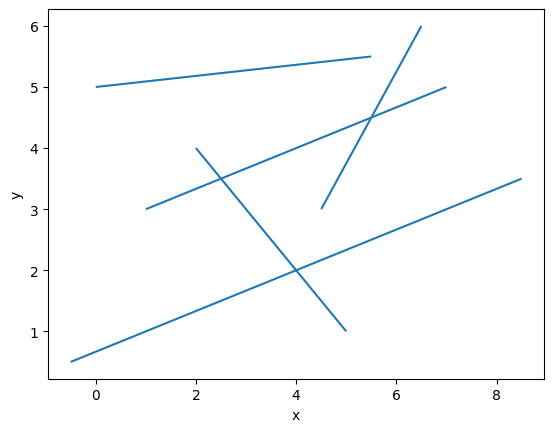

In [3]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

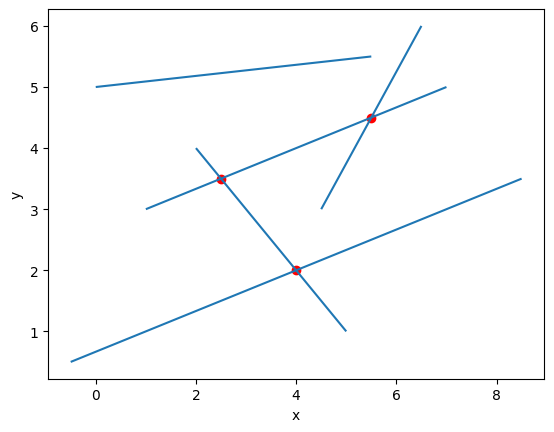

In [4]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [5]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    tab =[]
    x =[]
    i = 0
    while i<n:
        x1 = np.random.uniform(0, max_x)
        y1 = np.random.uniform(0, max_y)
        x2 = np.random.uniform(0, max_x)
        y2 = np.random.uniform(0, max_y)
        if x1!=x2 and x1 not in x and x2 not in x:
            x.append(x1)
            x.append(x2)
            current=[(x1, y1), (x2, y2)]
            current.sort(key=lambda x: x[0])
            tab.append((current[0], current[1]))
            i+=1
    return tab

In [6]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 1.188s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [7]:
section = generate_uniform_sections(1000,1000,20)

Zwizualizuj otrzymane odcinki

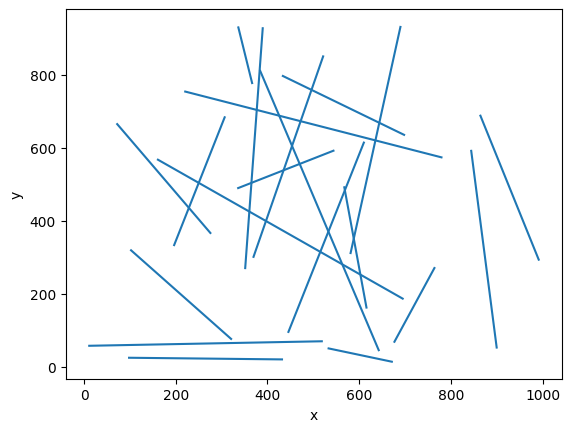

In [8]:
vis = Visualizer()
vis.add_line_segment(section)
vis.show()


In [9]:
import numpy as np
import cv2

# ============================================================================

CANVAS_SIZE = (900,1600)

FINAL_LINE_COLOR = (255, 255, 255)
WORKING_LINE_COLOR = (127, 127, 127)

# ============================================================================

class SectionsDrawer(object):
    def __init__(self, window_name):
        self.window_name = window_name # Name for our window

        self.done = False # Flag signalling we're done
        self.current = (0, 0) # Current position, so we can draw the line-in-progress
        self.points = []


    def on_mouse(self, event, x, y, buttons, user_param):
        # Mouse callback that gets called for every mouse event (i.e. moving, clicking, etc.)

        if self.done: # Nothing more to do
            return

        if event == cv2.EVENT_MOUSEMOVE:
            # We want to be able to draw the line-in-progress, so update current mouse position
            self.current = (x, y)
        elif event == cv2.EVENT_LBUTTONDOWN:
            # Left click means adding a point at current position to the list of points
            print("Adding point #%d with position(%d,%d)" % (len(self.points), x, 900-y))
            self.points.append((x, y))
        elif event == cv2.EVENT_RBUTTONDOWN:
            # Right click means we're done
            print("Completing polygon with %d points." % len(self.points))
            self.done = True


    def run(self):
        # Let's create our working window and set a mouse callback to handle events
        cv2.namedWindow(self.window_name, flags=cv2.WINDOW_AUTOSIZE)
        cv2.imshow(self.window_name, np.zeros(CANVAS_SIZE, np.uint8))
        cv2.waitKey(1)
        cv2.setMouseCallback(self.window_name, self.on_mouse)

        while(not self.done):
            # This is our drawing loop, we just continuously draw new images
            # and show them in the named window
            canvas = np.zeros(CANVAS_SIZE, np.uint8)
            dl = len(self.points)
            if  dl>0:
                # Draw all the current polygon segments
                for i in range(0,dl,2):
                    if i+1<dl:
                        cv2.polylines(canvas, np.array([[self.points[i],self.points[i+1]]]), False, FINAL_LINE_COLOR, 1)
                # And  also show what the current segment would look like
                if dl%2==1:
                    cv2.line(canvas, self.points[-1], self.current, WORKING_LINE_COLOR)
            # Update the window
            cv2.imshow(self.window_name, canvas)
            # And wait 50ms before next iteration (this will pump window messages meanwhile)
            if cv2.waitKey(50) == 27: # ESC hit
                self.done = True

        # User finised entering the polygon points, so let's make the final drawing
        canvas = np.zeros(CANVAS_SIZE, np.uint8)
        # of a filled polygon
        # if (len(self.points) > 0):
        #     cv2.fillPoly(canvas, np.array([self.points]), FINAL_LINE_COLOR)
        # And show it
        cv2.imshow(self.window_name, canvas)
        # Waiting for the user to press any key
        cv2.waitKey()

        cv2.destroyWindow(self.window_name)
        return canvas
    
# ============================================================================

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką (jak?) TODO

In [10]:
def add_sections():
    pd = SectionsDrawer("sections")
    pd.run()
    sections = []
    dl = len(pd.points)
    #print(pd.points)
    i=0
    while i+1<dl:
        pom = [(pd.points[i][0], 900-pd.points[i][1]),(pd.points[i+1][0], 900-pd.points[i+1][1])]
        pom.sort(key=lambda x: x[0])
        sections.append((pom[0],pom[1]))
        i+=2
    print(sections)
    return sections

Uzupełnij funkcję ```is_intersection```

In [11]:
def is_intersection(sections):
    def orient(a, b, c):
            return (b[0]-a[0])*(c[1]-b[1]) - (b[1]-a[1])*(c[0]-b[0])

        # checks if p lies on the segment p1p2
    def on_segment(p1, p2, p):
            return min(p1[0], p2[1]) <= p[0] <= max(p1[0], p2[0]) and min(p1[1], p2[1]) <= p[1] <= max(p1[1], p2[1])
        
        # checks if line segment p1p2 and p3p4 intersect
    def intersect(p1, p2, p3, p4):
        d1 = orient(p3, p4, p1)
        d2 = orient(p3, p4, p2)
        d3 = orient(p1, p2, p3)
        d4 = orient(p1, p2, p4)

        if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and \
            ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
            return True

        elif d1 == 0 and on_segment(p3, p4, p1):
            return True
        elif d2 == 0 and on_segment(p3, p4, p2):
            return True
        elif d3 == 0 and on_segment(p1, p2, p3):
            return True
        elif d4 == 0 and on_segment(p1, p2, p4):
            return True
        else:
            return False

    
    def intersection( p0, p1, p2, p3 ) :
            s10_x = p1[0] - p0[0]
            s10_y = p1[1] - p0[1]
            s32_x = p3[0] - p2[0]
            s32_y = p3[1] - p2[1]

            denom = s10_x * s32_y - s32_x * s10_y
            s02_x = p0[0] - p2[0]
            s02_y = p0[1] - p2[1]
            t_numer = s32_x * s02_y - s32_y * s02_x
            t = t_numer / denom

            intersection_point = [ p0[0] + (t * s10_x), p0[1] + (t * s10_y) ]

            wspl_kierunkowy = s10_y/s10_x

            return intersection_point, wspl_kierunkowy
    
    def check_intersect(a, b):
        if intersect(sections[a][0], sections[a][1], sections[b][0], sections[b][1]):
            return True
        return False
            
    class Segment():
        def __init__(self, index):
            self.index = index

        def __eq__(self, other):
            return self.index==other.index
        
        def __ne__(self, other):
            return not self.__eq__(other)
        
        def __hash__(self):
            return hash(self.index)
        
        def __gt__(self, other):
            q0 = (x0, -10000)
            q1 = (x0, 10000)
            p0 = sections[self.index][0]
            p1 = sections[self.index][1]
            p2 = sections[other.index][0]
            p3 = sections[other.index][1]
            S, a1 = intersection(p0,p1,q0,q1)
            O, a2 = intersection(p2,p3,q0,q1)
            if abs(S[1]-O[1])>0: return S[1]>O[1]
            return a1>a2

        
        def __lt__(self, other):
            return not self.__gt__(other) and not self.__eq__(other)
        
        def __ge__(self, other):
            return self.__gt__(other) or self.__eq__(other)
        
        def __le__(self, other):
            return self.__lt__(other) or self.__eq__(other)

        
    
    n = len(sections)
    intersections = {}
    for i in range(n):
        intersections[(0,i,i)] = sections[i][0][0]
        intersections[(1,i,i)] = sections[i][1][0]
    
    Q = SortedSet(key = lambda x: intersections[x]) # struktura zdarzeń - posortowany zbiór rozważanych punktów
    for i in range(n):
        Q.add((0, i, i))
        Q.add((1, i, i)) #  indeksy krotki: 0-typ punktu, 1,2-odcinek lub odcinki
        
    x0 = 0
    T = SortedSet() # struktura stanu - obecnie rozważane odcinki
    
    while len(Q)>0:
        p = Q.pop(0)
        # Zaktualizuj T i Q
        if p[0]==0: # lewy koniec odcinka
            x0 = intersections[(p[0],p[1],p[1])]
            T.add(Segment(p[1]))
            where = -1
            where = T.bisect_right(Segment(p[1]))-1
            if where+1<T.__len__() and where>=0:
                a = T[where+1].index
                b = T[where].index
                if check_intersect(a,b): return True             
            if where<T.__len__() and where-1>=0:
                a = T[where-1].index
                b = T[where].index
                if check_intersect(a,b): return True       
                  
        elif p[0]==1: # prawy koniec
            x0 = intersections[(p[0],p[1],p[1])]
            where=-1
            where = T.bisect_right(Segment(p[1]))-1
            if where+1<T.__len__() and where-1>=0:
                a = T[where+1].index
                b = T[where-1].index
                if check_intersect(a,b): return True        
            T.__delitem__(where)           

    return False

In [12]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.016s


In [13]:
is_intersection(add_sections())

Adding point #0 with position(406,628)
Adding point #1 with position(586,579)
Adding point #2 with position(447,451)
Adding point #3 with position(507,351)
Adding point #4 with position(789,513)
Adding point #5 with position(923,648)
Adding point #6 with position(927,512)
Adding point #7 with position(1006,389)
Completing polygon with 8 points.
[((406, 628), (586, 579)), ((447, 451), (507, 351)), ((789, 513), (923, 648)), ((927, 512), (1006, 389))]


False

### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [14]:
def is_intersections_with_visualization(sections):
    def orient(a, b, c):
            return (b[0]-a[0])*(c[1]-b[1]) - (b[1]-a[1])*(c[0]-b[0])

        # checks if p lies on the segment p1p2
    def on_segment(p1, p2, p):
            return min(p1[0], p2[1]) <= p[0] <= max(p1[0], p2[0]) and min(p1[1], p2[1]) <= p[1] <= max(p1[1], p2[1])
        
        # checks if line segment p1p2 and p3p4 intersect
    def intersect(p1, p2, p3, p4):
        d1 = orient(p3, p4, p1)
        d2 = orient(p3, p4, p2)
        d3 = orient(p1, p2, p3)
        d4 = orient(p1, p2, p4)

        if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and \
            ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
            return True

        elif d1 == 0 and on_segment(p3, p4, p1):
            return True
        elif d2 == 0 and on_segment(p3, p4, p2):
            return True
        elif d3 == 0 and on_segment(p1, p2, p3):
            return True
        elif d4 == 0 and on_segment(p1, p2, p4):
            return True
        else:
            return False

    
    def intersection( p0, p1, p2, p3 ) :
            s10_x = p1[0] - p0[0]
            s10_y = p1[1] - p0[1]
            s32_x = p3[0] - p2[0]
            s32_y = p3[1] - p2[1]

            denom = s10_x * s32_y - s32_x * s10_y
            s02_x = p0[0] - p2[0]
            s02_y = p0[1] - p2[1]
            t_numer = s32_x * s02_y - s32_y * s02_x
            t = t_numer / denom

            intersection_point = [ p0[0] + (t * s10_x), p0[1] + (t * s10_y) ]

            wspl_kierunkowy = s10_y/s10_x

            return intersection_point, wspl_kierunkowy
    
    def check_intersect(a, b):
        if intersect(sections[a][0], sections[a][1], sections[b][0], sections[b][1]):
            v,_ = intersection(sections[a][0], sections[a][1], sections[b][0], sections[b][1])
            vis.add_point(v, color='red')
            return True
        return False
                

    class Segment():
        def __init__(self, index):
            self.index = index

        def __eq__(self, other):
            return self.index==other.index
        
        def __ne__(self, other):
            return not self.__eq__(other)
        
        def __hash__(self):
            return hash(self.index)
        
        def __gt__(self, other):
            q0 = (x0, -1000)
            q1 = (x0, 1000)
            p0 = sections[self.index][0]
            p1 = sections[self.index][1]
            p2 = sections[other.index][0]
            p3 = sections[other.index][1]
            S, a1 = intersection(p0,p1,q0,q1)
            O, a2 = intersection(p2,p3,q0,q1)
            if abs(S[1]-O[1])>0: return S[1]>O[1]
            return a1>a2

        
        def __lt__(self, other):
            return not self.__gt__(other) and not self.__eq__(other)
        
        def __ge__(self, other):
            return self.__gt__(other) or self.__eq__(other)
        
        def __le__(self, other):
            return self.__lt__(other) or self.__eq__(other)

        
    vis = Visualizer()
    vis.add_line_segment(sections,color='black')
    n = len(sections)
    intersections = {}
    for i in range(n):
        intersections[(0,i,i)] = sections[i][0][0]
        intersections[(1,i,i)] = sections[i][1][0]
    
    Q = SortedSet(key = lambda x: intersections[x]) # struktura zdarzeń - posortowany zbiór rozważanych punktów
    for i in range(n):
        Q.add((0, i, i))
        Q.add((1, i, i)) #  indeksy krotki: 0-typ punktu, 1,2-odcinek lub odcinki
        

    points = []
    for a,b in sections:
        points.append(a)
        points.append(b)
    vis.add_point(points, color='green')
    x0 = 0
    T = SortedSet() # struktura stanu - obecnie rozważane odcinki
    
    while len(Q)>0:
        p = Q.pop(0)
        ls = vis.add_line(((intersections[p], 0),(intersections[p], 1)))
        # Zaktualizuj T i Q
        if p[0]==0: # lewy koniec odcinka
            x0 = intersections[(p[0],p[1],p[1])]
            T.add(Segment(p[1]))
            where = -1
            where = T.bisect_right(Segment(p[1]))-1
            if where+1<T.__len__() and where>=0:
                a = T[where+1].index
                b = T[where].index
                if check_intersect(a,b): return vis            
            if where<T.__len__() and where-1>=0:
                a = T[where-1].index
                b = T[where].index
                if check_intersect(a,b): return vis         
                  
        elif p[0]==1: # prawy koniec
            x0 = intersections[(p[0],p[1],p[1])]
            where = T.bisect_right(Segment(p[1]))-1
            if where+1<T.__len__() and where-1>=0:
                a = T[where+1].index
                b = T[where-1].index
                if check_intersect(a,b): return vis          
            T.__delitem__(where) 
                      
        vis.remove_figure(ls)
    
    return vis

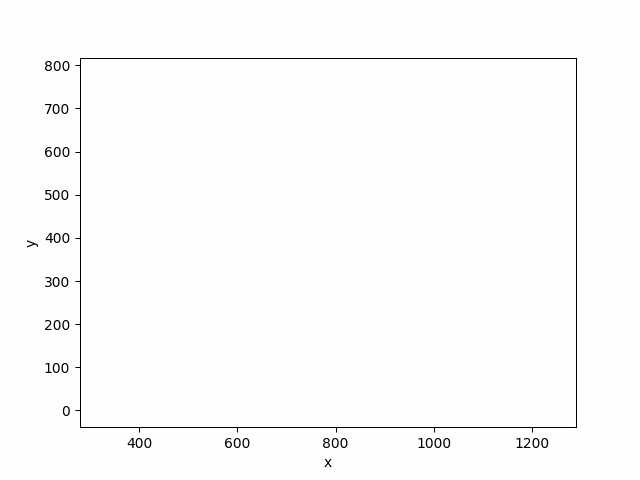

In [15]:
sections = [((325, 681), (841, 284)), ((345, 374), (1051, 703)), ((612, 738), (1126, 406)), ((626, 268), (1111, 606)), ((820, 768), (1244, 474)), ((955, 311), (1106, 779))]
vis = is_intersections_with_visualization(sections)
vis.show_gif(interval=700)

Uzupełnij funkcję ```find_intersections```

In [16]:
def find_intersections(sections):
    def orient(a, b, c):
            return (b[0]-a[0])*(c[1]-b[1]) - (b[1]-a[1])*(c[0]-b[0])

        # checks if p lies on the segment p1p2
    def on_segment(p1, p2, p):
            return min(p1[0], p2[1]) <= p[0] <= max(p1[0], p2[0]) and min(p1[1], p2[1]) <= p[1] <= max(p1[1], p2[1])
        
        # checks if line segment p1p2 and p3p4 intersect
    def intersect(p1, p2, p3, p4):
        d1 = orient(p3, p4, p1)
        d2 = orient(p3, p4, p2)
        d3 = orient(p1, p2, p3)
        d4 = orient(p1, p2, p4)

        if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and \
            ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
            return True

        elif d1 == 0 and on_segment(p3, p4, p1):
            return True
        elif d2 == 0 and on_segment(p3, p4, p2):
            return True
        elif d3 == 0 and on_segment(p1, p2, p3):
            return True
        elif d4 == 0 and on_segment(p1, p2, p4):
            return True
        else:
            return False

    
    def intersection( p0, p1, p2, p3 ) :
            s10_x = p1[0] - p0[0]
            s10_y = p1[1] - p0[1]
            s32_x = p3[0] - p2[0]
            s32_y = p3[1] - p2[1]

            denom = s10_x * s32_y - s32_x * s10_y
            s02_x = p0[0] - p2[0]
            s02_y = p0[1] - p2[1]
            t_numer = s32_x * s02_y - s32_y * s02_x
            t = t_numer / denom

            intersection_point = [ p0[0] + (t * s10_x), p0[1] + (t * s10_y) ]

            wspl_kierunkowy = s10_y/s10_x

            return intersection_point, wspl_kierunkowy
    
    def check_intersect(Q, a, b,p,inter):
        if intersect(sections[a][0], sections[a][1], sections[b][0], sections[b][1]):
            v,_ = intersection(sections[a][0], sections[a][1], sections[b][0], sections[b][1])
            if v[0]>inter[(p[0],p[1],p[2])] and (2, a, b) not in Q and (2, b, a) not in Q:
                cross.append((a,b,v))
                inter[(2,a,b)] = v[0]
                inter[(2,b,a)] = v[0]
                Q.add((2, a, b))

    class Segment():
        def __init__(self, index):
            self.index = index

        def __eq__(self, other):
            return self.index==other.index
        
        def __ne__(self, other):
            return not self.__eq__(other)
        
        def __hash__(self):
            return hash(self.index)
        
        def __gt__(self, other):
            q0 = (x0, -10000)
            q1 = (x0, 10000)
            p0 = sections[self.index][0]
            p1 = sections[self.index][1]
            p2 = sections[other.index][0]
            p3 = sections[other.index][1]
            S, a1 = intersection(p0,p1,q0,q1)
            O, a2 = intersection(p2,p3,q0,q1)
            if abs(S[1]-O[1])>0: return S[1]>O[1]
            return a1>a2

        
        def __lt__(self, other):
            return not self.__gt__(other) and not self.__eq__(other)
        
        def __ge__(self, other):
            return self.__gt__(other) or self.__eq__(other)
        
        def __le__(self, other):
            return self.__lt__(other) or self.__eq__(other)

        
    
    cross = []
    n = len(sections)
    intersections = {}
    for i in range(n):
        intersections[(0,i,i)] = sections[i][0][0]
        intersections[(1,i,i)] = sections[i][1][0]
    
    Q = SortedSet(key = lambda x: intersections[x]) # struktura zdarzeń - posortowany zbiór rozważanych punktów
    for i in range(n):
        Q.add((0, i, i))
        Q.add((1, i, i)) #  indeksy krotki: 0-typ punktu, 1,2-odcinek lub odcinki
        
    x0 = 0
    T = SortedSet() # struktura stanu - obecnie rozważane odcinki
    
    while len(Q)>0:
        p = Q.pop(0)
        # Zaktualizuj T i Q
        if p[0]==0: # lewy koniec odcinka
            x0 = intersections[(p[0],p[1],p[1])]
            T.add(Segment(p[1]))
            where = -1
            where = T.bisect_right(Segment(p[1]))-1
            if where+1<T.__len__() and where>=0:
                a = T[where+1].index
                b = T[where].index
                check_intersect(Q, a,b,p,intersections)             
            if where<T.__len__() and where-1>=0:
                a = T[where-1].index
                b = T[where].index
                check_intersect(Q, a,b,p,intersections)       
                  
        elif p[0]==1: # prawy koniec
            x0 = intersections[(p[0],p[1],p[1])]
            where=-1
            where = T.bisect_right(Segment(p[1]))-1
            if where+1<T.__len__() and where-1>=0:
                a = T[where+1].index
                b = T[where-1].index
                check_intersect(Q, a,b,p,intersections)          
            T.__delitem__(where)
            
        elif p[0]==2:
            where1, where2 = -1, -1
            where1=T.bisect_right(Segment(p[1]))-1
            where2=T.bisect_right(Segment(p[2]))-1
            id1 = max(where1,where2)
            id2 = min(where1,where2)
            T.__delitem__(id1)
            T.__delitem__(id2)
            x0 = intersections[(p[0],p[1],p[2])]+10**-12
            T.add(Segment(p[1]))
            T.add(Segment(p[2]))
            if id1>=0 and id1+1<T.__len__():
                a = T[id1].index
                b = T[id1+1].index
                check_intersect(Q, a,b,p,intersections)             
            if id2<T.__len__() and id2-1>=0:
                a = T[id2].index
                b = T[id2-1].index
                check_intersect(Q, a,b,p,intersections)    
                
                         
    #print(cross) # odcinek1, odcinek2, punkt przciecia
    result = []
    for a,b,c in cross:
        result.append(str(c[0])+' '+str(c[1])+' '+str(a+1)+' '+str(b+1))

    return result

In [17]:
Test().runtest(3, find_intersections)
# odpowiedzi są poprawne, ale testy są beznadziejne

Lab 4, task 3:
	Test 1: WRONG ANSWER
		Output:   ['-0.0016743790516658141 -0.007263586832941069 1 2', '0.01152607474025421 0.006132801296422442 2 3', '0.011860591253227503 -0.018140143229495413 3 1', '0.0223444511307787 0.017111754849194888 2 4', '0.022658670631229855 -0.026817363547212175 4 1']
		Expected: ['-0.0016743790516658117 -0.007263586832941072 1 2', '0.011526074740254208 0.006132801296422439 2 3', '0.011860591253227505 -0.018140143229495424 1 3', '0.022344451130778698 0.01711175484919488 2 4', '0.022658670631229855 -0.026817363547212168 1 4']
	Test 2: WRONG ANSWER
		Output:   ['0.005806934807635715 -0.01655644472067816 2 3', '0.013332591183346308 -0.01619339562692305 3 4', '0.010025601838031008 -0.020988202988542266 2 4']
		Expected: ['0.005806934807635715 -0.016556444720678153 2 3', '0.010025601838031018 -0.020988202988542273 2 4', '0.013332591183346312 -0.01619339562692305 3 4']
	Test 3: Passed
Result: 1/3
Time: 0.000s


Uzupełnij funkcję ```find_intersections_with_visualization```

In [18]:
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    def orient(a, b, c):
            return (b[0]-a[0])*(c[1]-b[1]) - (b[1]-a[1])*(c[0]-b[0])

        # checks if p lies on the segment p1p2
    def on_segment(p1, p2, p):
            return min(p1[0], p2[1]) <= p[0] <= max(p1[0], p2[0]) and min(p1[1], p2[1]) <= p[1] <= max(p1[1], p2[1])
        
        # checks if line segment p1p2 and p3p4 intersect
    def intersect(p1, p2, p3, p4):
        d1 = orient(p3, p4, p1)
        d2 = orient(p3, p4, p2)
        d3 = orient(p1, p2, p3)
        d4 = orient(p1, p2, p4)

        if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and \
            ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
            return True

        elif d1 == 0 and on_segment(p3, p4, p1):
            return True
        elif d2 == 0 and on_segment(p3, p4, p2):
            return True
        elif d3 == 0 and on_segment(p1, p2, p3):
            return True
        elif d4 == 0 and on_segment(p1, p2, p4):
            return True
        else:
            return False

    
    def intersection( p0, p1, p2, p3 ) :
            s10_x = p1[0] - p0[0]
            s10_y = p1[1] - p0[1]
            s32_x = p3[0] - p2[0]
            s32_y = p3[1] - p2[1]

            denom = s10_x * s32_y - s32_x * s10_y
            s02_x = p0[0] - p2[0]
            s02_y = p0[1] - p2[1]
            t_numer = s32_x * s02_y - s32_y * s02_x
            t = t_numer / denom

            intersection_point = [ p0[0] + (t * s10_x), p0[1] + (t * s10_y) ]

            wspl_kierunkowy = s10_y/s10_x

            return intersection_point, wspl_kierunkowy
    
    def check_intersect(Q, a, b,p,inter):
        if intersect(sections[a][0], sections[a][1], sections[b][0], sections[b][1]):
            v,_ = intersection(sections[a][0], sections[a][1], sections[b][0], sections[b][1])
            if v[0]>inter[(p[0],p[1],p[2])] and (2, a, b) not in Q and (2, b, a) not in Q:
                vis.add_point(v, color='red')
                cross.append((a,b,2))
                inter[(2,a,b)] = v[0]
                inter[(2,b,a)] = v[0]
                Q.add((2, a, b))

    class Segment():
        def __init__(self, index):
            self.index = index

        def __eq__(self, other):
            return self.index==other.index
        
        def __ne__(self, other):
            return not self.__eq__(other)
        
        def __hash__(self):
            return hash(self.index)
        
        def __gt__(self, other):
            q0 = (x0, -1000)
            q1 = (x0, 1000)
            p0 = sections[self.index][0]
            p1 = sections[self.index][1]
            p2 = sections[other.index][0]
            p3 = sections[other.index][1]
            S, a1 = intersection(p0,p1,q0,q1)
            O, a2 = intersection(p2,p3,q0,q1)
            if abs(S[1]-O[1])>0: return S[1]>O[1]
            return a1>a2

        
        def __lt__(self, other):
            return not self.__gt__(other) and not self.__eq__(other)
        
        def __ge__(self, other):
            return self.__gt__(other) or self.__eq__(other)
        
        def __le__(self, other):
            return self.__lt__(other) or self.__eq__(other)

        
    
    cross = []
    vis = Visualizer()
    vis.add_line_segment(sections,color='black')
    n = len(sections)
    intersections = {}
    for i in range(n):
        intersections[(0,i,i)] = sections[i][0][0]
        intersections[(1,i,i)] = sections[i][1][0]
    
    Q = SortedSet(key = lambda x: intersections[x]) # struktura zdarzeń - posortowany zbiór rozważanych punktów
    for i in range(n):
        Q.add((0, i, i))
        Q.add((1, i, i)) #  indeksy krotki: 0-typ punktu, 1,2-odcinek lub odcinki
        

    points = []
    for a,b in sections:
        points.append(a)
        points.append(b)
    vis.add_point(points, color='green')
    x0 = 0
    T = SortedSet() # struktura stanu - obecnie rozważane odcinki
    
    while len(Q)>0:
        p = Q.pop(0)
        ls = vis.add_line(((intersections[p], 0),(intersections[p], 1)))
        # Zaktualizuj T i Q
        if p[0]==0: # lewy koniec odcinka
            x0 = intersections[(p[0],p[1],p[1])]
            T.add(Segment(p[1]))
            where = -1
            where = T.bisect_right(Segment(p[1]))-1
            if where+1<T.__len__() and where>=0:
                a = T[where+1].index
                b = T[where].index
                check_intersect(Q, a,b,p,intersections)             
            if where<T.__len__() and where-1>=0:
                a = T[where-1].index
                b = T[where].index
                check_intersect(Q, a,b,p,intersections)       
                  
        elif p[0]==1: # prawy koniec
            x0 = intersections[(p[0],p[1],p[1])]
            where = T.bisect_right(Segment(p[1]))-1
            if where+1<T.__len__() and where-1>=0:
                a = T[where+1].index
                b = T[where-1].index
                check_intersect(Q, a,b,p,intersections)      
            T.__delitem__(where) 
            
        elif p[0]==2:
            where1, where2 = -1, -1
            where1=T.bisect_right(Segment(p[1]))-1
            where2=T.bisect_right(Segment(p[2]))-1
            id1 = max(where1,where2)
            id2 = min(where1,where2)
            T.__delitem__(id1)
            T.__delitem__(id2)
            x0 = intersections[(p[0],p[1],p[2])]+10**-12
            T.add(Segment(p[1]))
            T.add(Segment(p[2]))
            
            if id1>=0 and id1+1<T.__len__():
                a = T[id1].index
                b = T[id1+1].index
                check_intersect(Q, a,b,p,intersections)             
            if id2<T.__len__() and id2-1>=0:
                a = T[id2].index
                b = T[id2-1].index
                check_intersect(Q, a,b,p,intersections)             
        vis.remove_figure(ls)
    
    return vis

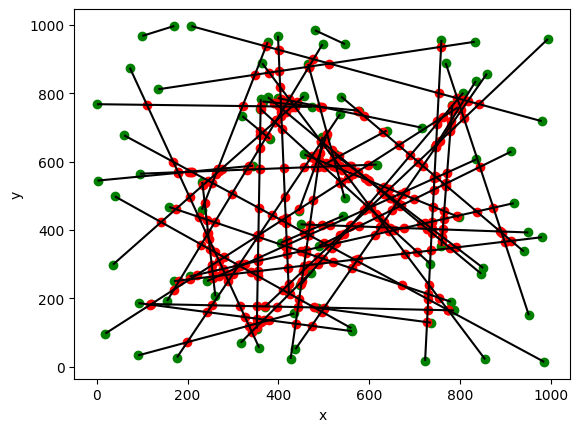

In [19]:
sections_ex2 = [((195, 607), (821, 176)), ((307, 313), (1031, 779)), ((483, 163), (670, 705)), ((466, 313), (646, 226)), ((514, 418), (544, 444)), ((634, 411), (781, 332)), ((686, 324), (949, 563)), ((803, 369), (930, 510)), ((721, 562), (1256, 259)), ((545, 630), (1153, 671)), ((796, 590), (947, 624)), ((725, 299), (751, 302)), ((1000, 239), (1445, 704)), ((1383, 410), (1524, 264)), ((1426, 277), (1525, 486)), ((1445, 602), (1549, 639))]
sections_ex4 = [((148, 95), (1524, 848)), ((117, 869), (1525, 64)), ((236, 406), (368, 498)), ((416, 523), (503, 415)), ((556, 404), (665, 485)), ((707, 462), (772, 463))]
sections_ex3 = generate_uniform_sections(1000,1000,50)
sections_ex1 = [((325, 681), (841, 284)), ((345, 374), (1051, 703)), ((612, 738), (1126, 406)), ((626, 268), (1111, 606)), ((820, 768), (1244, 474)), ((955, 311), (1106, 779))]
#new_sections = add_sections()
anim = find_intersections_with_visualization(sections_ex3)
anim.show()

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.

In [20]:
def find_intersections_slow(sections):
    def intersection( p0, p1, p2, p3 ) :

            s10_x = p1[0] - p0[0]
            s10_y = p1[1] - p0[1]
            s32_x = p3[0] - p2[0]
            s32_y = p3[1] - p2[1]

            denom = s10_x * s32_y - s32_x * s10_y
            s02_x = p0[0] - p2[0]
            s02_y = p0[1] - p2[1]
            t_numer = s32_x * s02_y - s32_y * s02_x
            t = t_numer / denom

            intersection_point = [ p0[0] + (t * s10_x), p0[1] + (t * s10_y) ]


            return intersection_point
    
    def check_intersect(Q, a, b,p,inter):
        def orient(a, b, c):
            return (b[0]-a[0])*(c[1]-b[1]) - (b[1]-a[1])*(c[0]-b[0])

        # checks if p lies on the segment p1p2
        def on_segment(p1, p2, p):
            return min(p1[0], p2[1]) <= p[0] <= max(p1[0], p2[0]) and min(p1[1], p2[1]) <= p[1] <= max(p1[1], p2[1])
        
        # checks if line segment p1p2 and p3p4 intersect
        def intersect(p1, p2, p3, p4):
            d1 = orient(p3, p4, p1)
            d2 = orient(p3, p4, p2)
            d3 = orient(p1, p2, p3)
            d4 = orient(p1, p2, p4)

            if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and \
                ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
                return True

            elif d1 == 0 and on_segment(p3, p4, p1):
                return True
            elif d2 == 0 and on_segment(p3, p4, p2):
                return True
            elif d3 == 0 and on_segment(p1, p2, p3):
                return True
            elif d4 == 0 and on_segment(p1, p2, p4):
                return True
            else:
                return False

        if intersect(sections[a][0], sections[a][1], sections[b][0], sections[b][1]):
            v = intersection(sections[a][0], sections[a][1], sections[b][0], sections[b][1])
            if v[0]>inter[(p[0],p[1],p[2])] and (2, a, b) not in Q and (2, b, a) not in Q:
                cross.append((2,a,b))
                inter[(2,a,b)] = v[0]
                inter[(2,b,a)] = v[0]
                Q.add((2, a, b))


    cross = []
    n = len(sections)
    intersections = {}
    for i in range(n):
        intersections[(0,i,i)] = sections[i][0][0]
        intersections[(1,i,i)] = sections[i][1][0]
    
    Q = SortedSet(key = lambda x: intersections[x]) # struktura zdarzeń - posortowany zbiór rozważanych punktów
    for i in range(n):
        Q.add((0, i, i))
        Q.add((1, i, i)) #  0-typ punktu, 1,2-odcinek lub odcinki
    
    T = [] # struktura stanu - obecnie rozważane odcinki
    val = 0 # dl tablicy T
    
    while len(Q)>0:
        p = Q.pop(0)
        # Zaktualizuj T i Q
        if p[0]==0: # lewy koniec odcinka
            x0 = intersections[(p[0],p[1],p[1])]
            T.append(p[1])
            T.sort(key = lambda i: intersection(sections[i][0],sections[i][1],(x0,sections[i][0][1]),(x0,sections[i][1][1]))[1])
            val+=1
            where = -1
            where = T.index(p[1])
            if where+1<val and where>=0:
                a = T[where+1]
                b = T[where]
                check_intersect(Q, a,b,p,intersections)             
            if where<val and where-1>=0:
                a = T[where-1]
                b = T[where]
                check_intersect(Q, a,b,p,intersections)       
                  
        elif p[0]==1: # prawy koniec
            x0 = intersections[(p[0],p[1],p[1])]
            where = T.index(p[1])
            if where+1<val and where-1>=0:
                a = T[where+1]
                b = T[where-1]
                check_intersect(Q, a,b,p,intersections)           
            T.remove(p[1])
            val-=1  
            
        elif p[0]==2:
            x0 = intersections[(p[0],p[1],p[2])]+10**-12
            where1=T.index(p[1])
            where2=T.index(p[2])
            T.sort(key = lambda i: intersection(sections[i][0],sections[i][1],(x0,sections[i][0][1]),(x0,sections[i][1][1]))[1])
            id1 = max(where1,where2)
            id2 = min(where1,where2)
            if id1!=-1 and id1+1<val:
                a = T[id1]
                b = T[id1+1]
                check_intersect(Q, a,b,p,intersections)             
            if id2!=-1 and id2-1>=0:
                a = T[id2]
                b = T[id2-1]
                check_intersect(Q, a,b,p,intersections)   
        
    return cross

In [21]:
def special_case(max_x, n):
    i = 0 
    myset = set()
    sections = []
    while i < n: 
        x1,x2,y = np.random.uniform(0,max_x,3) 
        if x1 == x2:
            continue 
        if x1 in myset or x2 in myset or y in myset: 
            continue 

        myset.add(x1) 
        myset.add(x2)
        myset.add(y)
        i+=1
        x1,x2 = min(x1,x2),max(x1,x2)
        sections.append(((x1,y),(x2,y)))
    return sections


def measure_time(sections,n):
    import time
    start_time = time.time()
    l = find_intersections(sections)
    print('sortedset: ','liczba przeciec',len(l), 'liczba odcinkow',n , (time.time() - start_time))

    start_time = time.time()
    l = find_intersections_slow(sections)
    print('tablicowy: ','liczba przeciec',len(l), 'liczba odcinkow', n, (time.time() - start_time))

n = 2000
sections1 = generate_uniform_sections(1,100000,n)
sections2 = special_case(1,n)
measure_time(sections2,n)

sortedset:  liczba przeciec 0 liczba odcinkow 2000 0.17681002616882324


C:\Users\leymk\AppData\Local\Temp\ipykernel_6800\1375379696.py:13: RuntimeWarning: invalid value encountered in scalar divide
  t = t_numer / denom


tablicowy:  liczba przeciec 0 liczba odcinkow 2000 2.5915188789367676
